Cutflow saved
Cutflow plot saved
MET_pT  plot saved
MET_Phi  plot saved
Recoil  plot saved
Recoil_Phi  plot saved
HT  plot saved
debug_debug_MET_pTwithoutvetos  plot saved
debug_debug_MET_pTminusHEM  plot saved
debug_debug_MET_Phiwithoutvetos  plot saved
debug_debug_MET_PhiminusHEM  plot saved


/home/prayag/shivani_code/plottingTool.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax, rax) = plt.subplots(


debug_debug_Recoilwithoutvetos  plot saved
debug_debug_RecoilminusHEM  plot saved
debug_debug_Recoil_Phiwithoutvetos  plot saved
debug_debug_Recoil_PhiminusHEM  plot saved
Electron_pT  plot saved
Electron_Eta  plot saved
Electron_Phi  plot saved
dPhi_met_Electron  plot saved
dPhi_recoil_Electron  plot saved
debug_debug_Electron_pTwithoutvetos  plot saved
debug_debug_Electron_pTminusHEM  plot saved
debug_debug_Electron_Etawithoutvetos  plot saved
debug_debug_Electron_EtaminusHEM  plot saved
debug_debug_Electron_Phiwithoutvetos  plot saved
debug_debug_Electron_PhiminusHEM  plot saved
FJet_pT  plot saved
FJet_Eta  plot saved
FJet_Phi  plot saved
FJet_M  plot saved
FJet_Msd  plot saved
dPhi_met_FJet  plot saved
dPhi_Electron_FJet  plot saved
FJet_Area  plot saved
FJet_btagHbb  plot saved
FJet_deepTag_H  plot saved
FJet_particleNet_HbbvsQCD  plot saved
debug_debug_FJet_pTwithoutvetos  plot saved


KeyError: "'minusHEMminusHEM' not in axis"

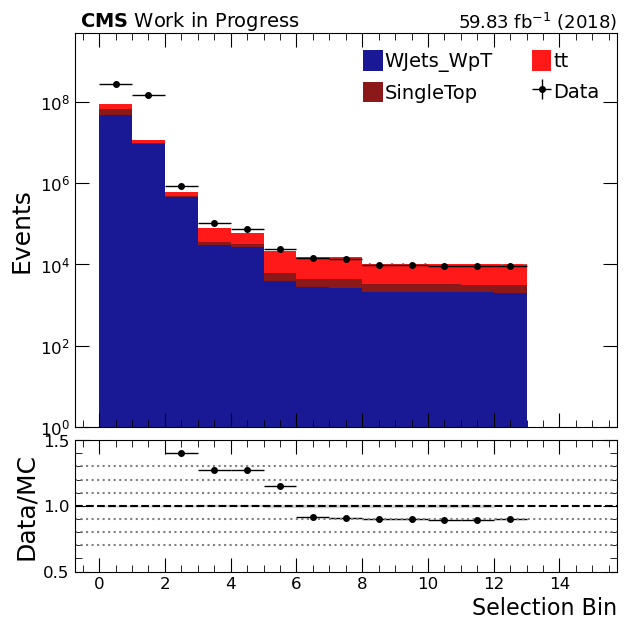

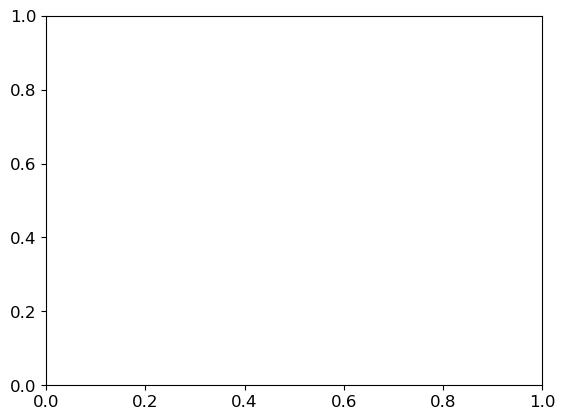

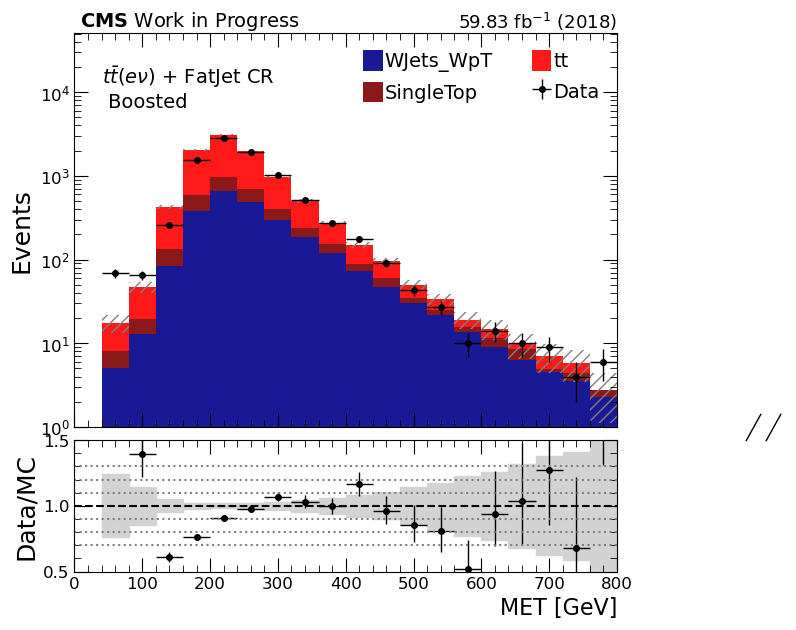

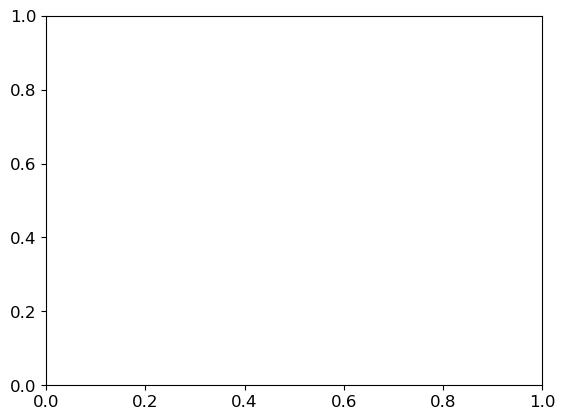

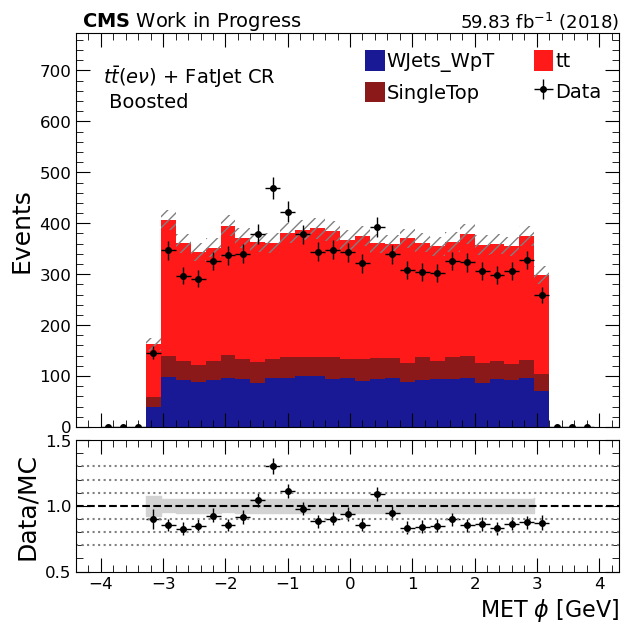

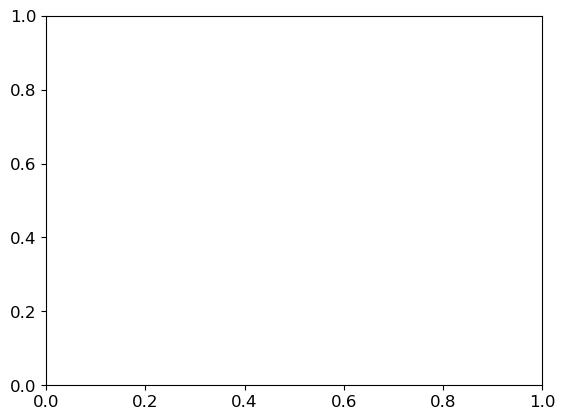

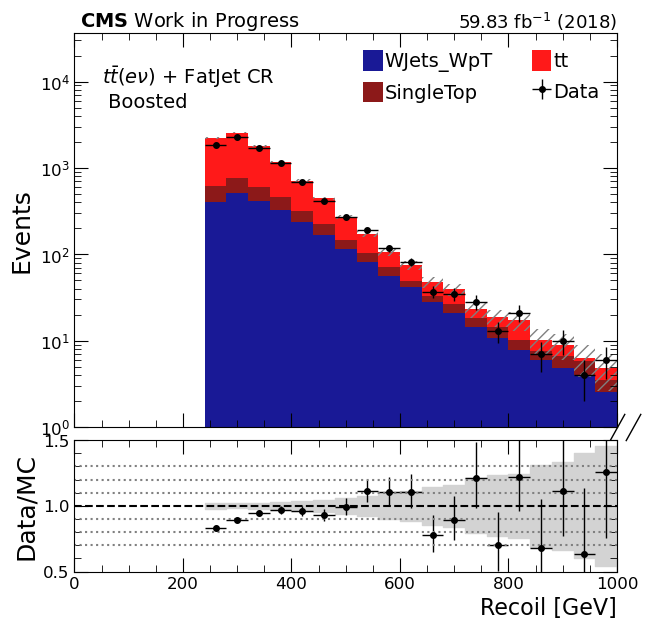

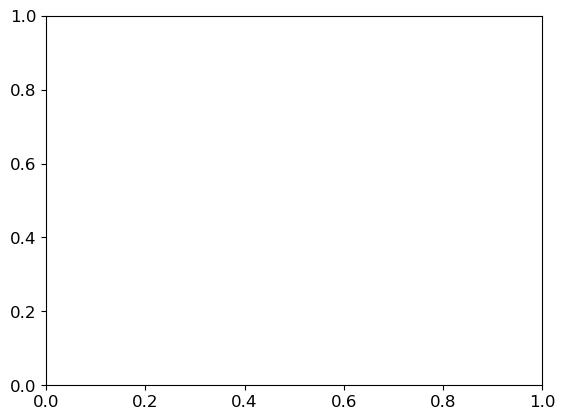

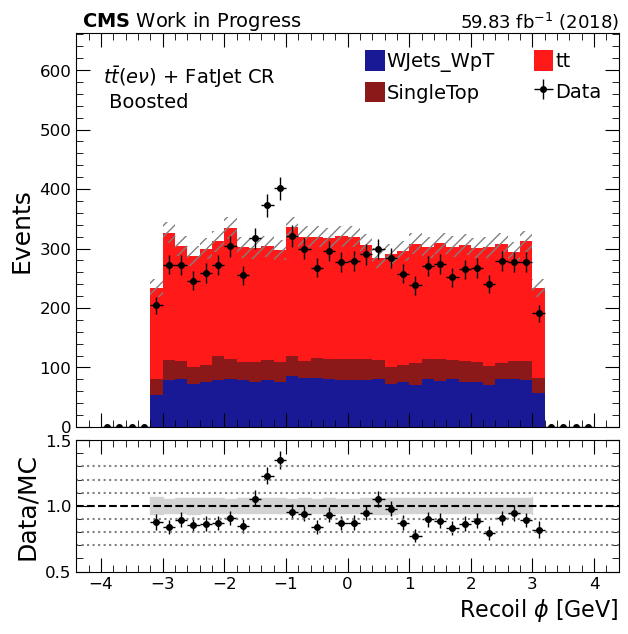

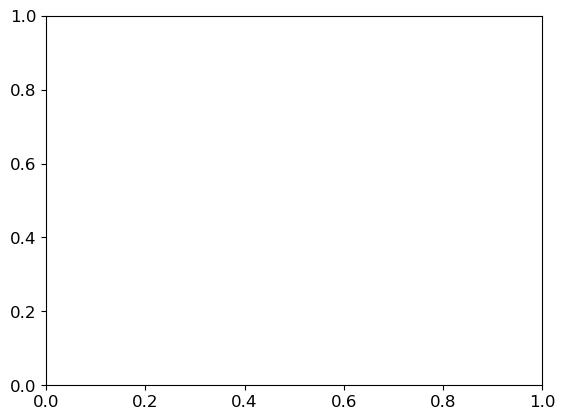

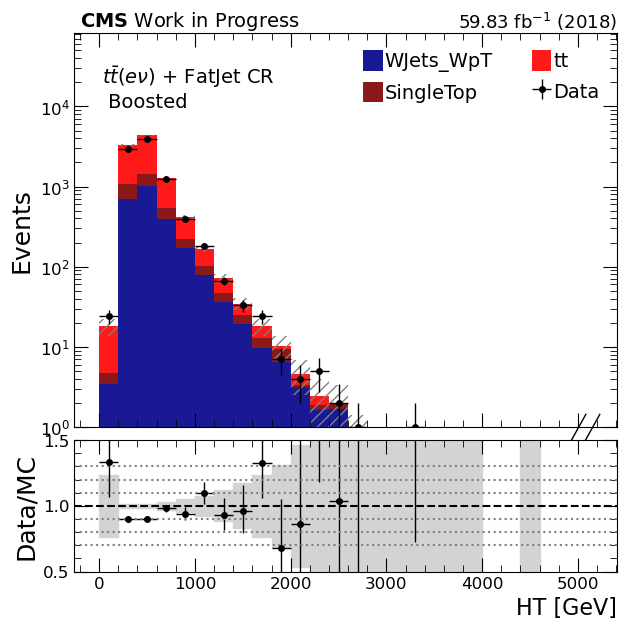

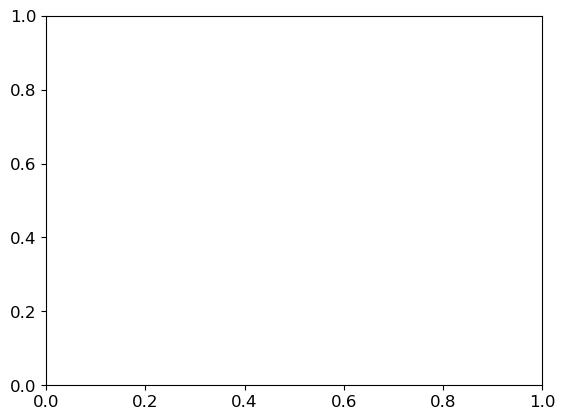

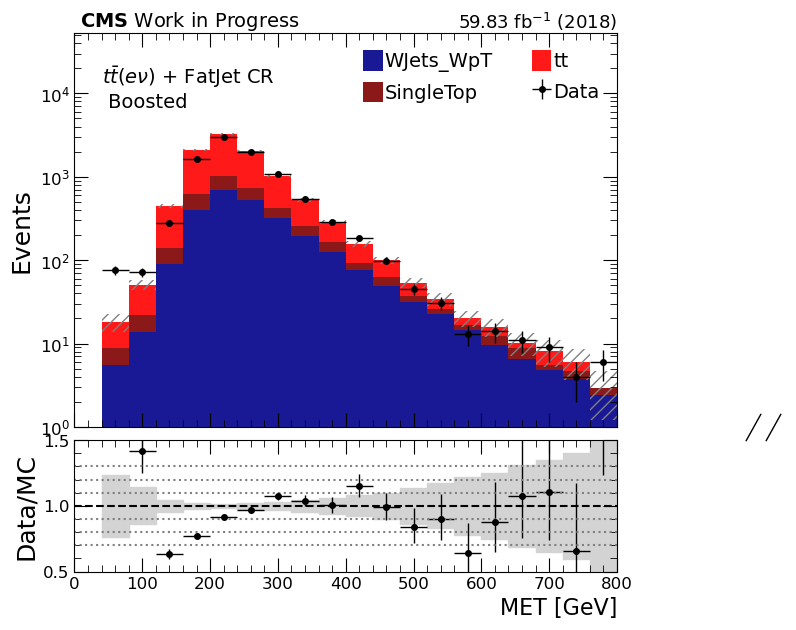

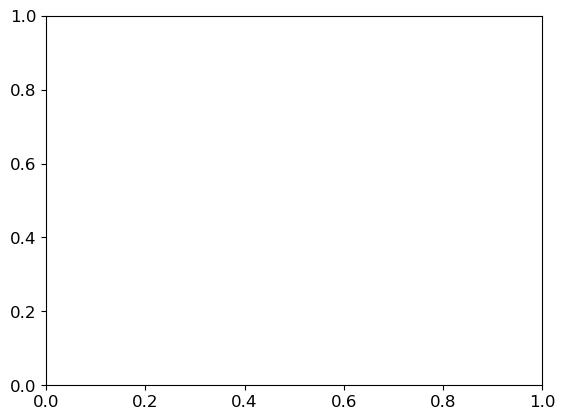

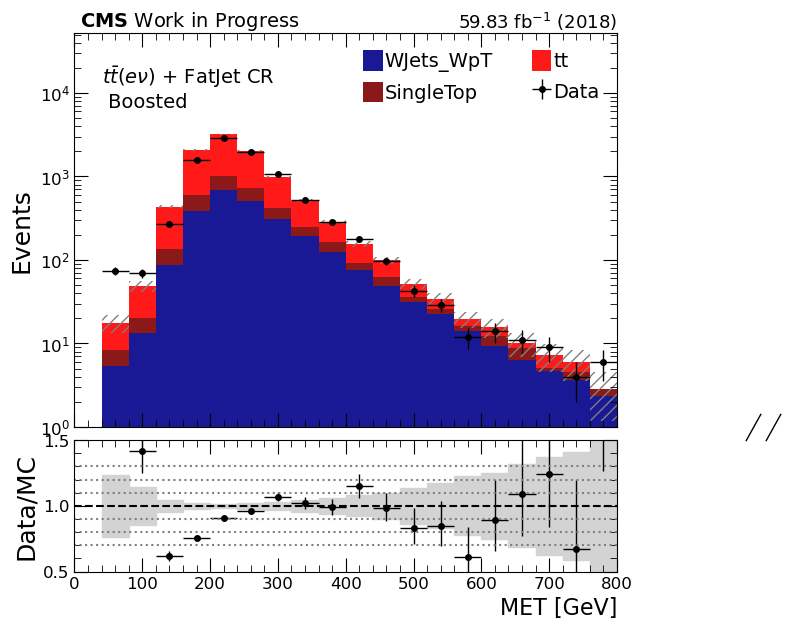

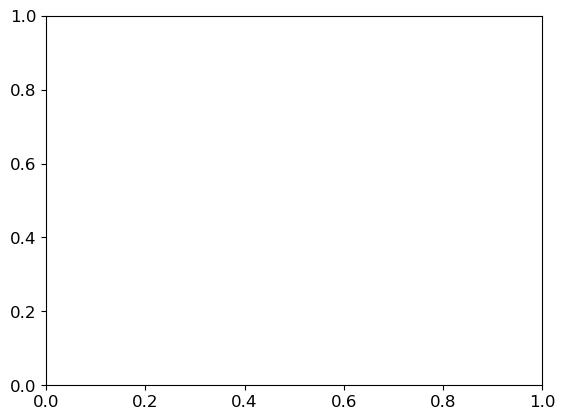

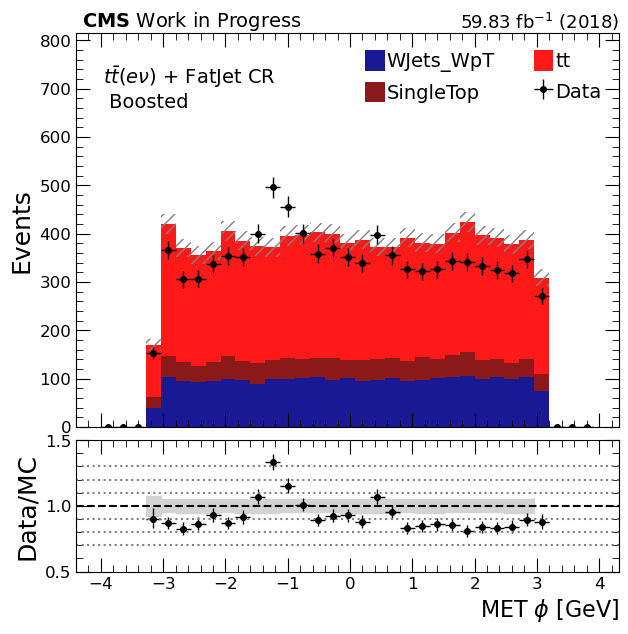

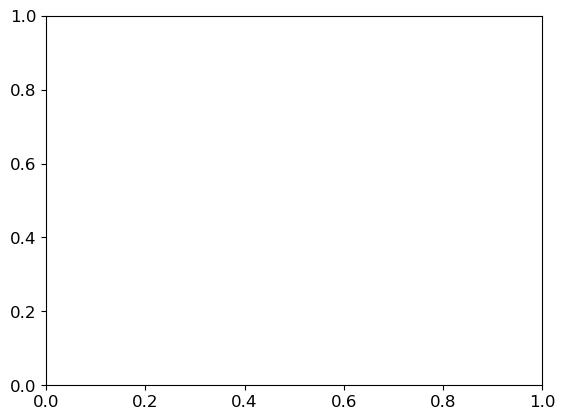

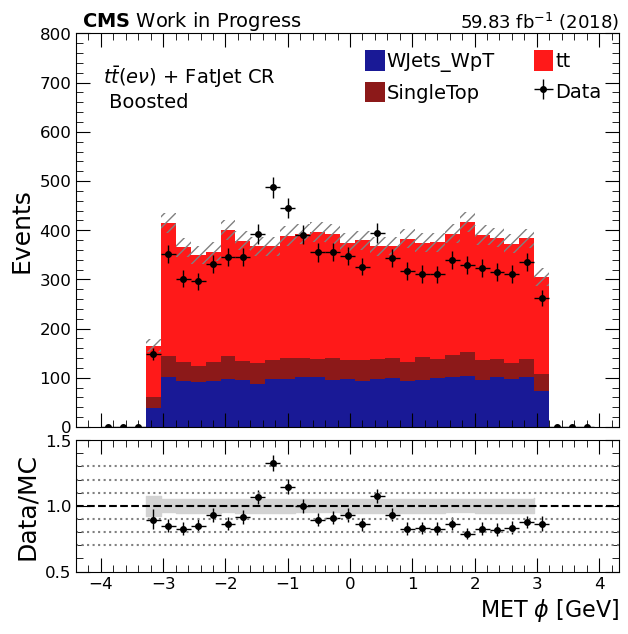

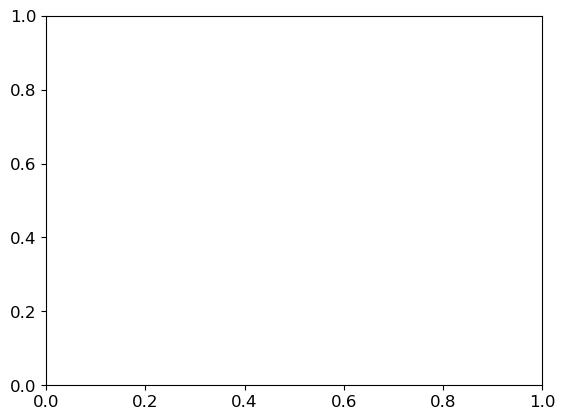

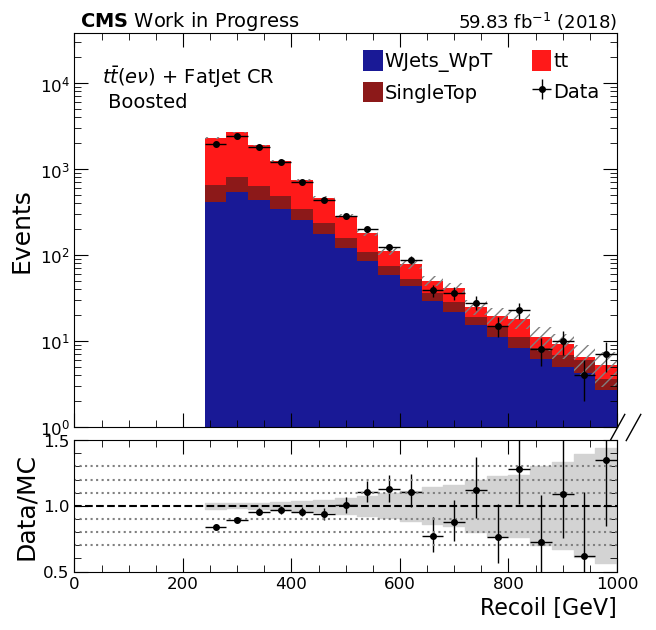

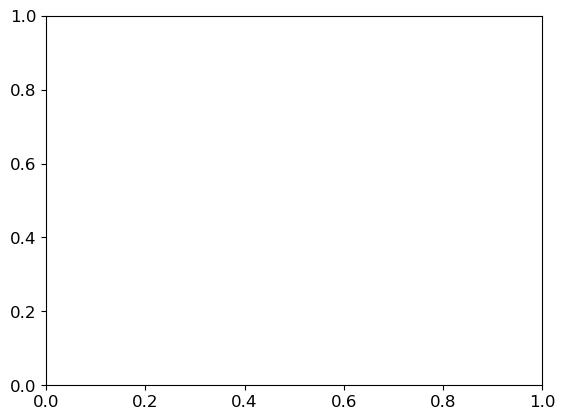

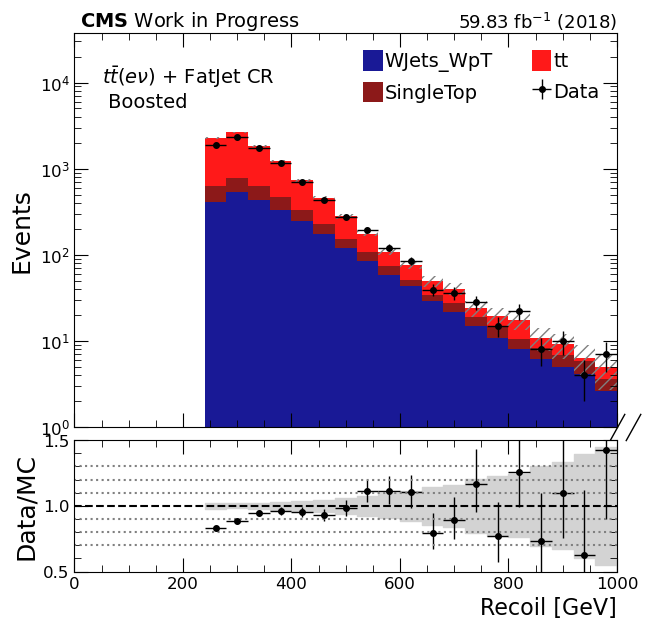

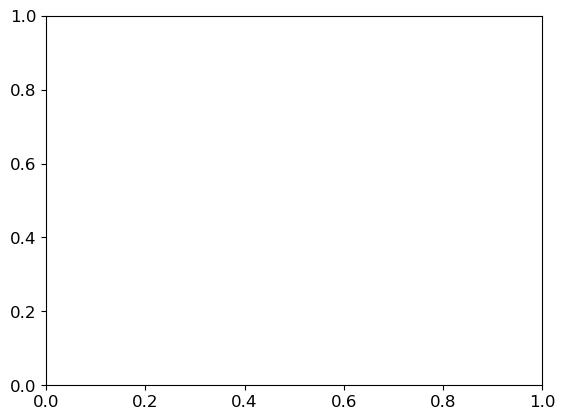

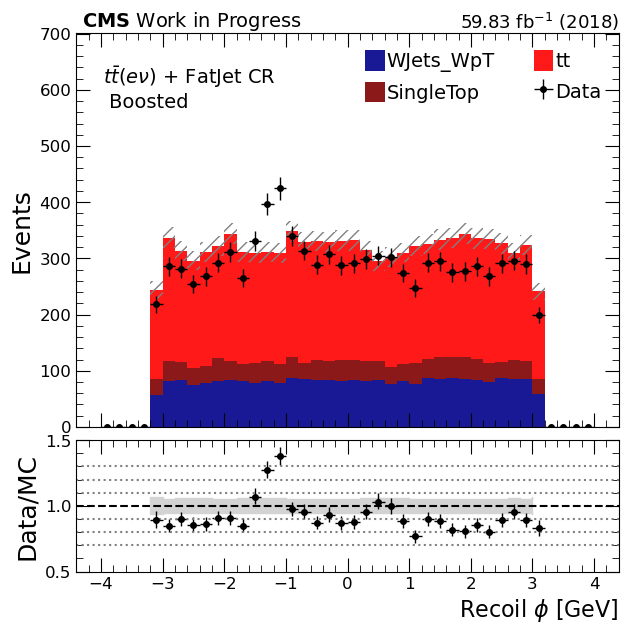

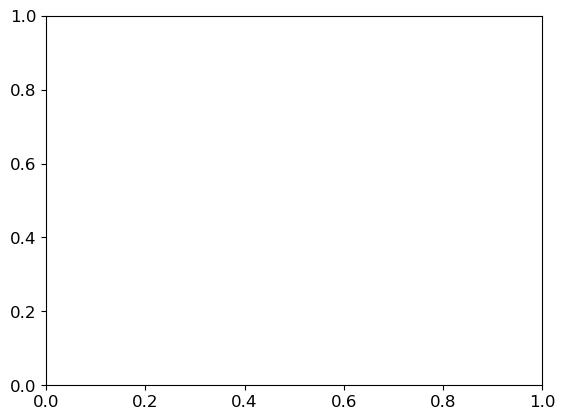

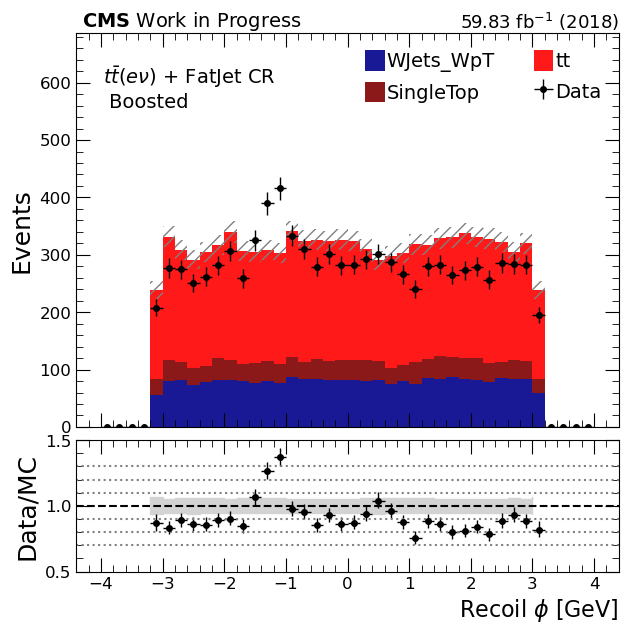

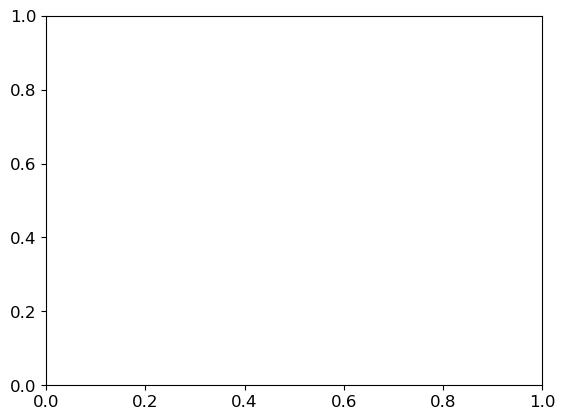

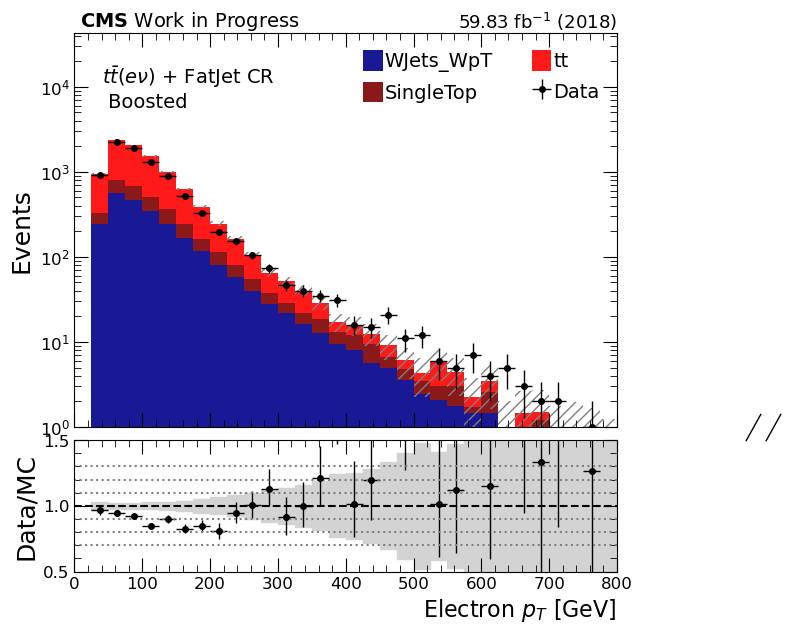

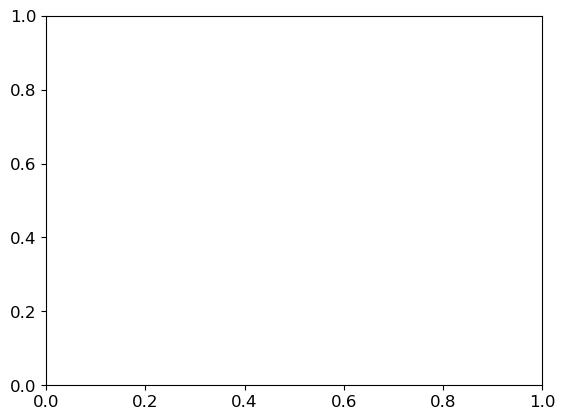

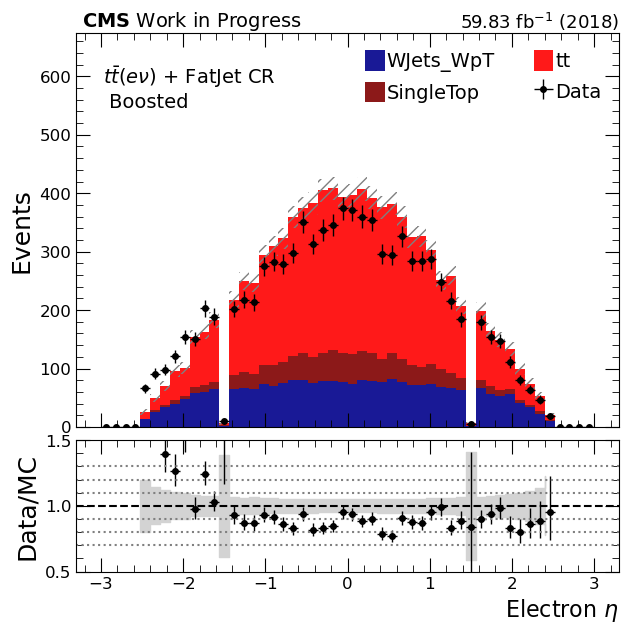

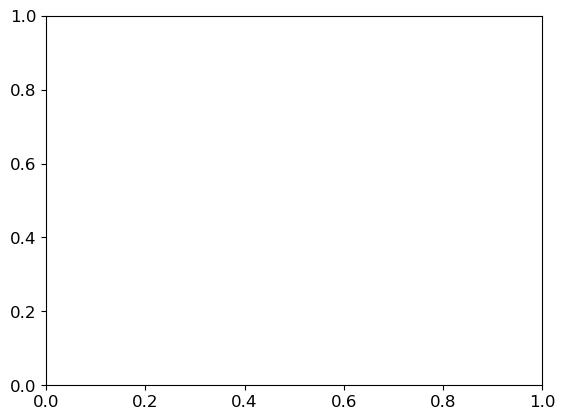

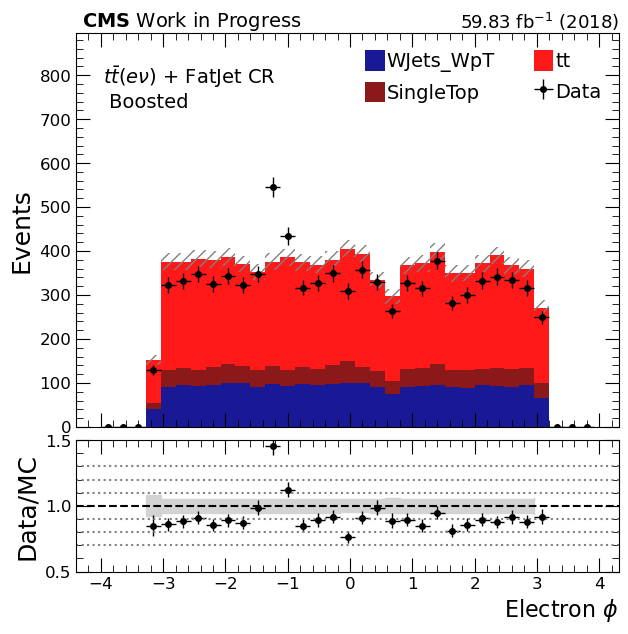

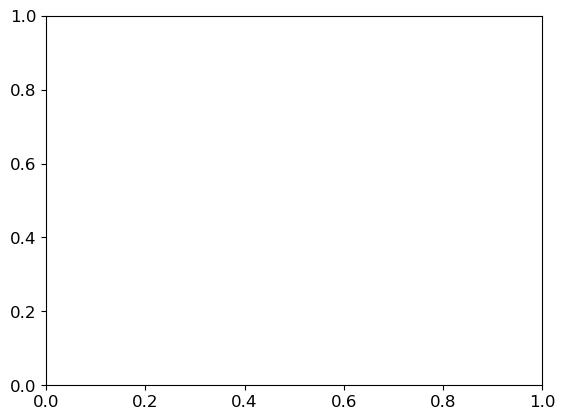

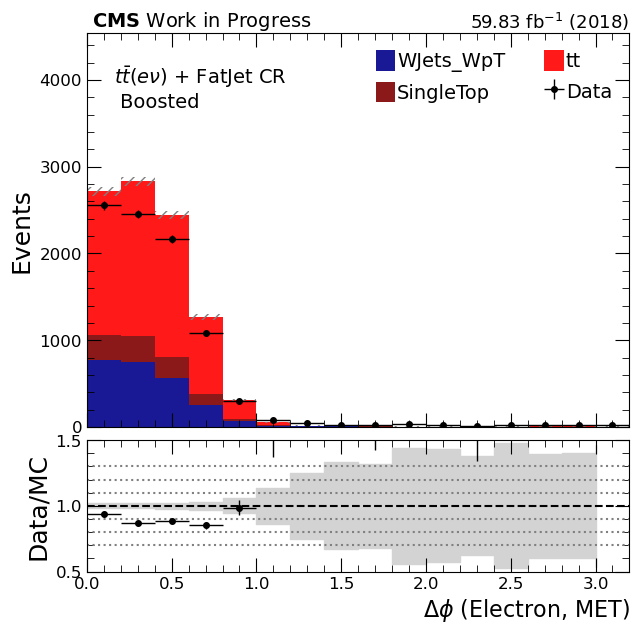

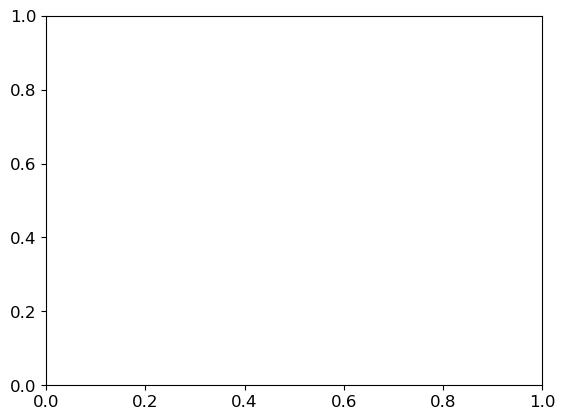

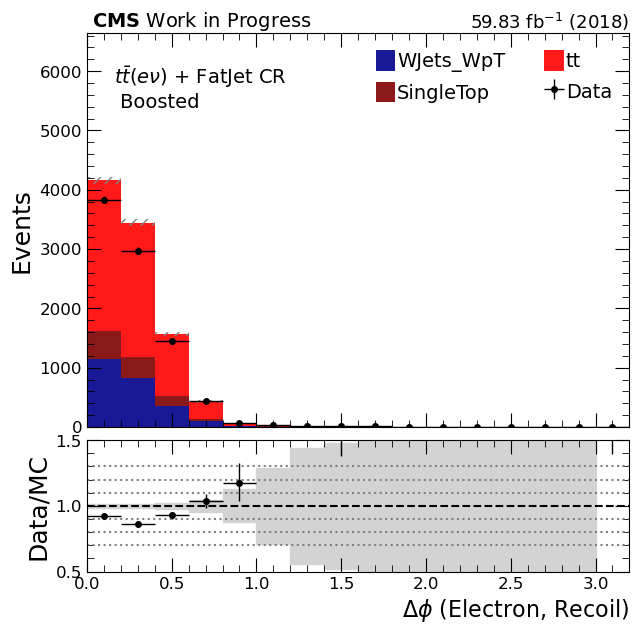

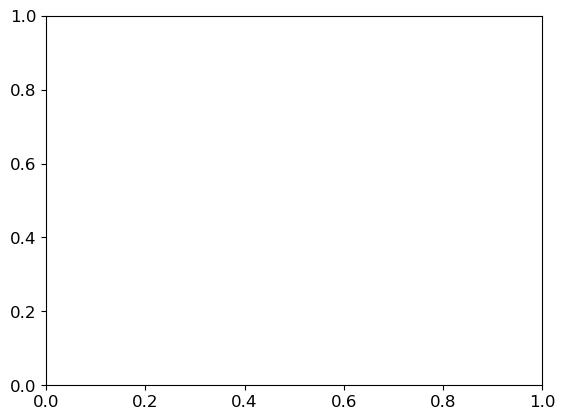

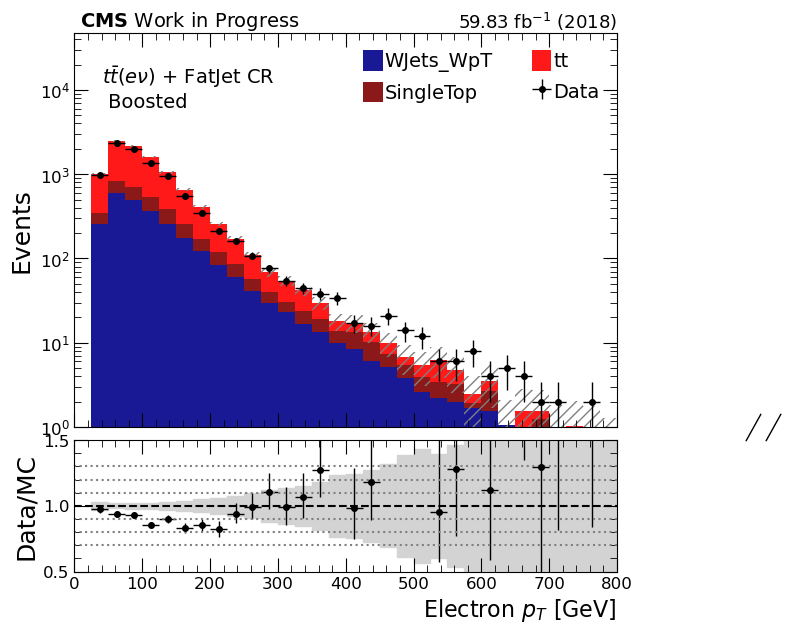

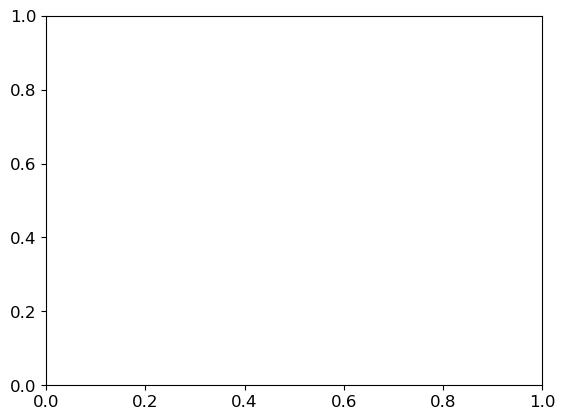

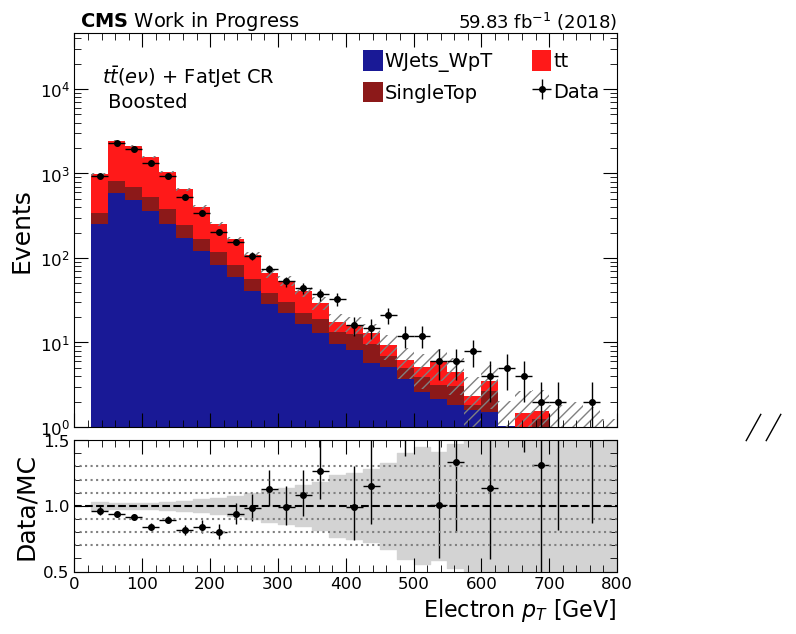

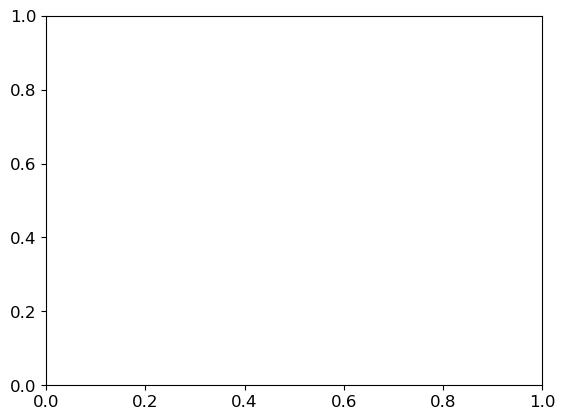

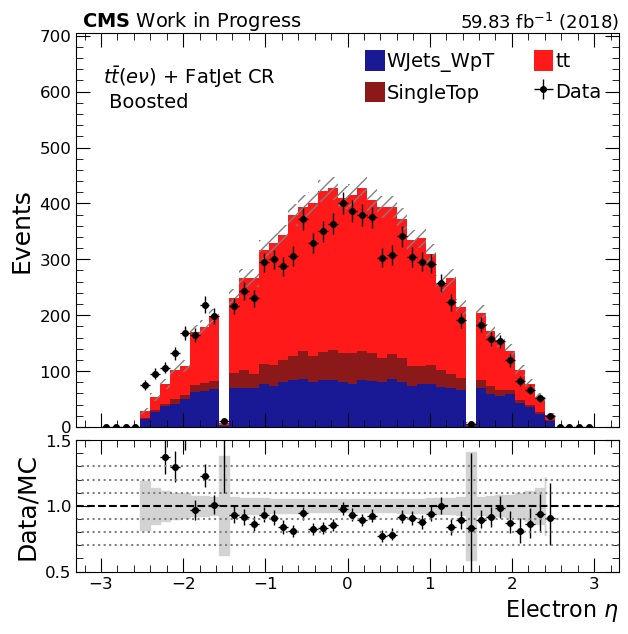

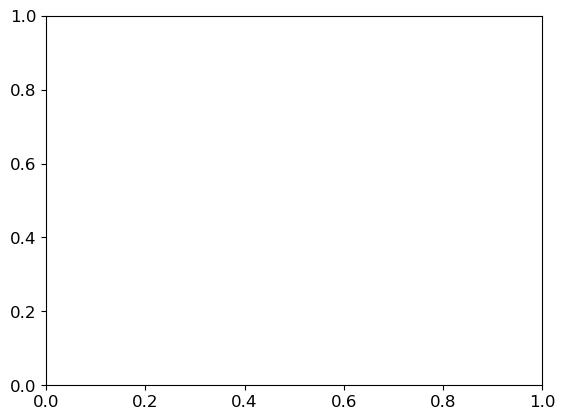

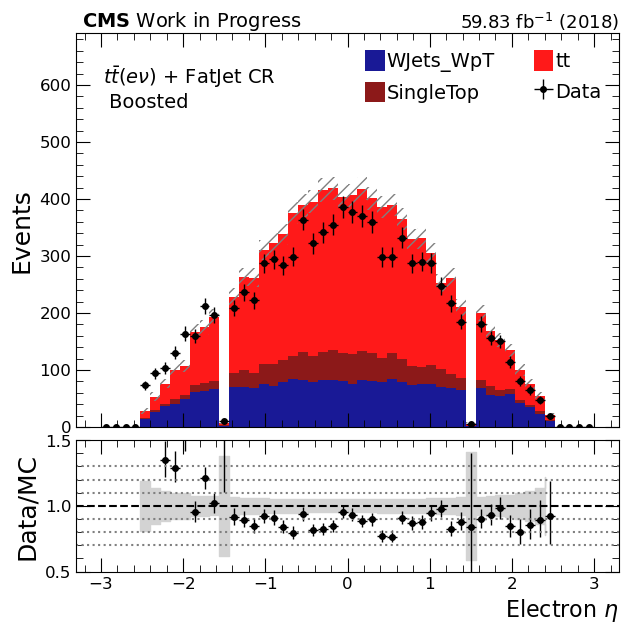

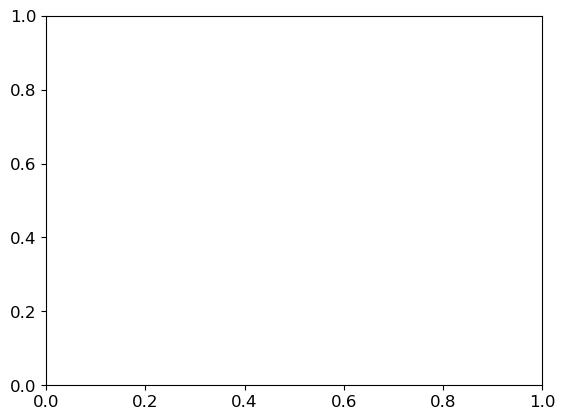

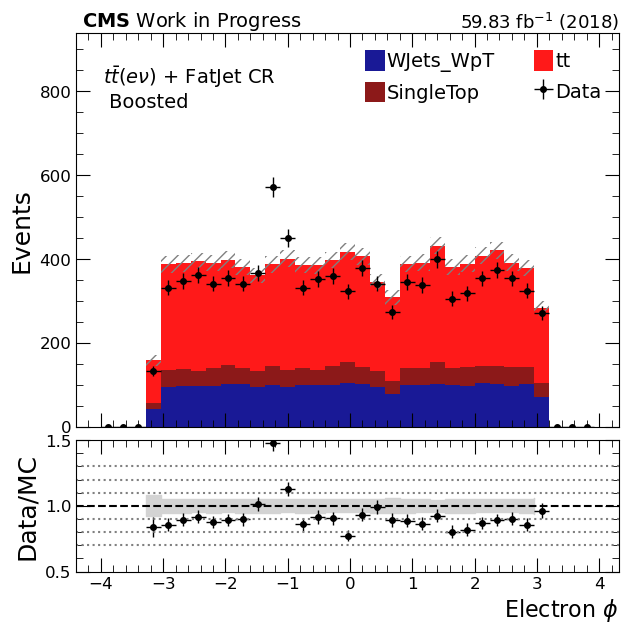

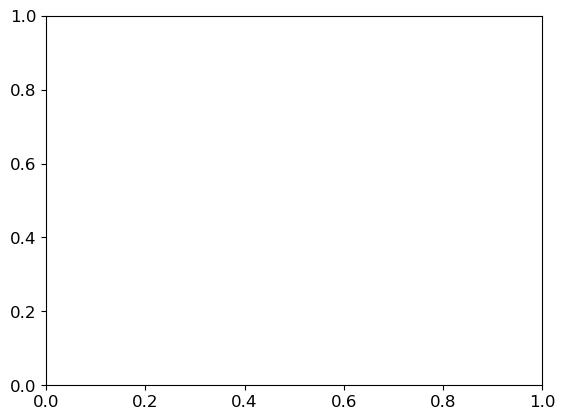

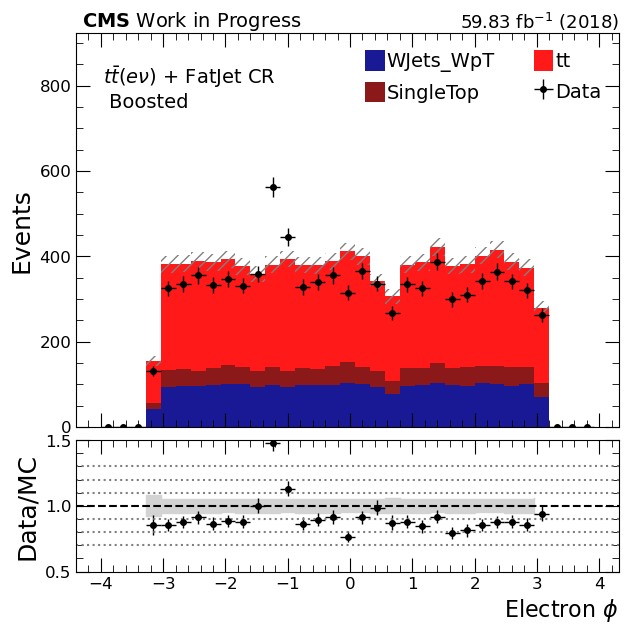

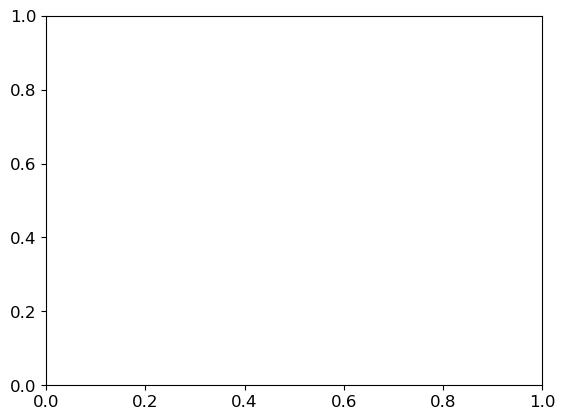

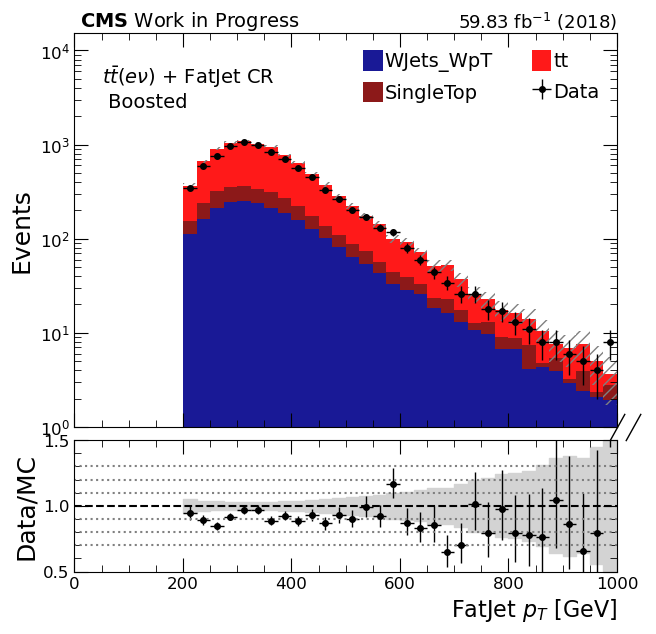

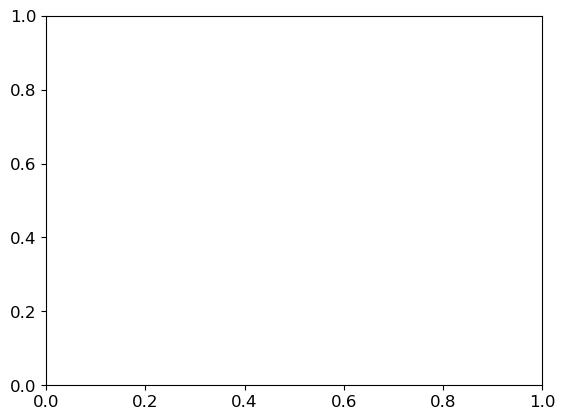

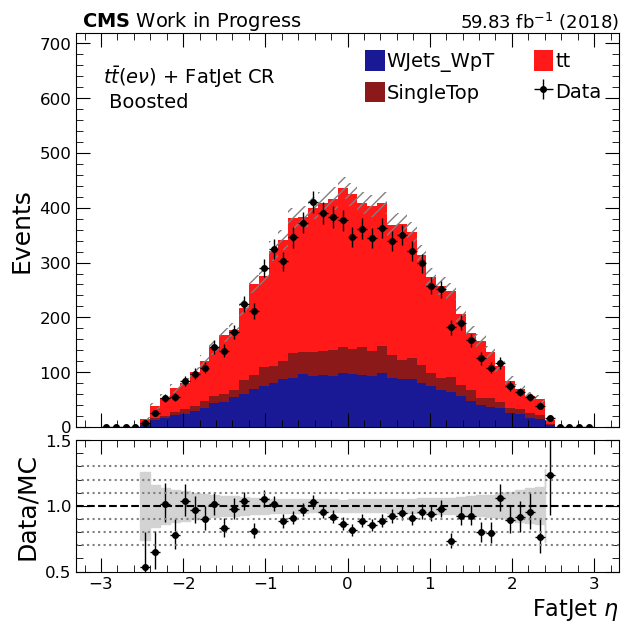

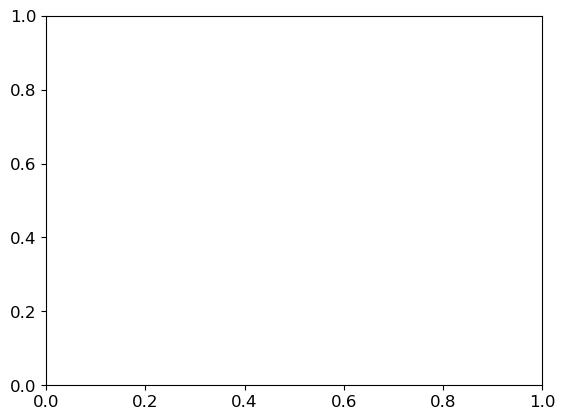

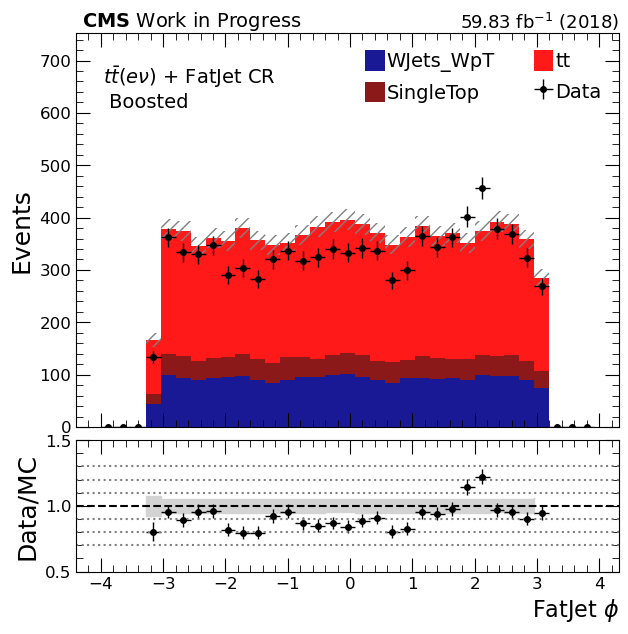

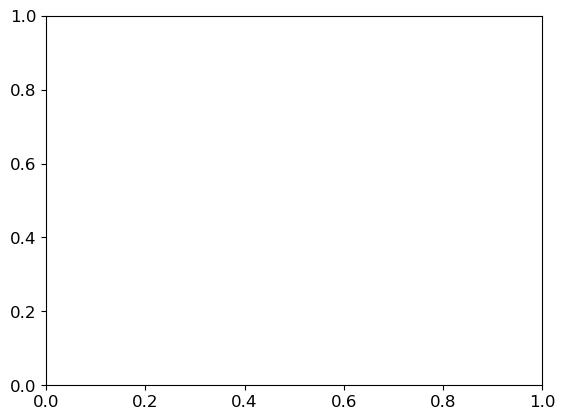

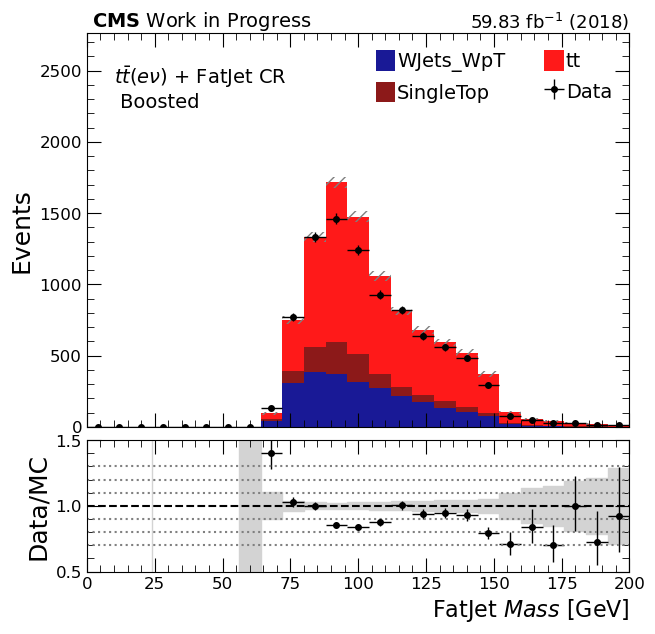

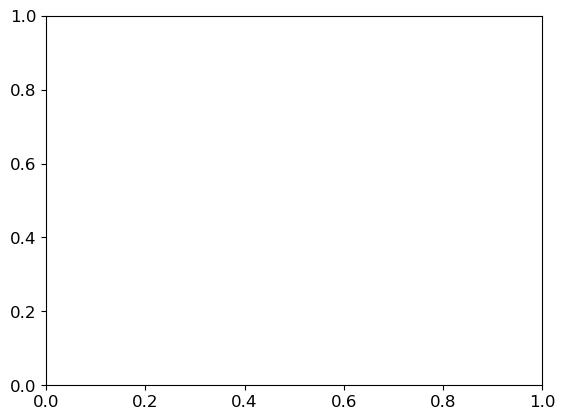

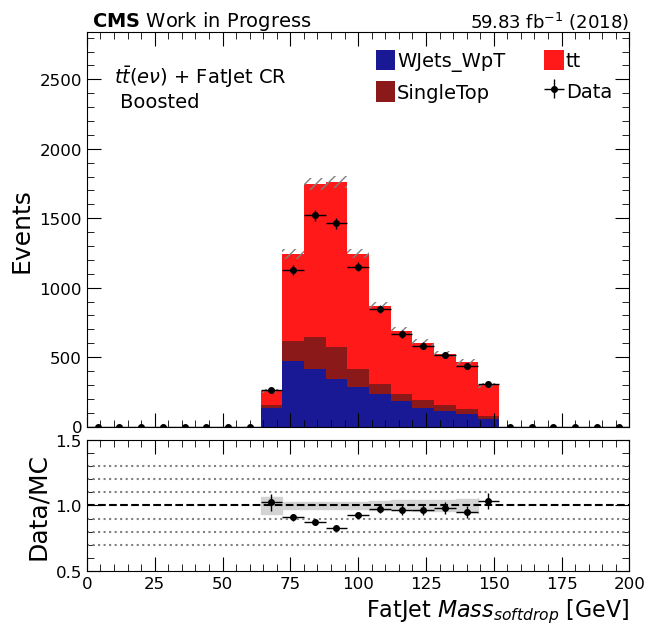

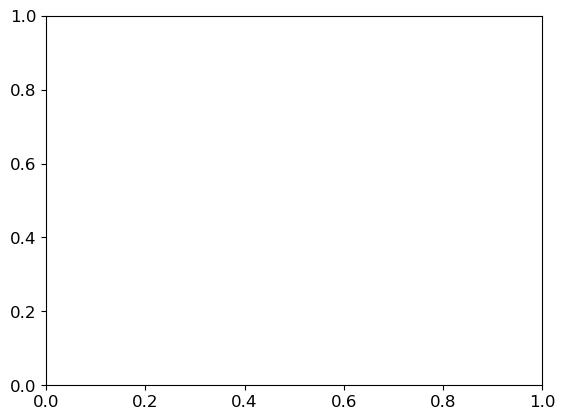

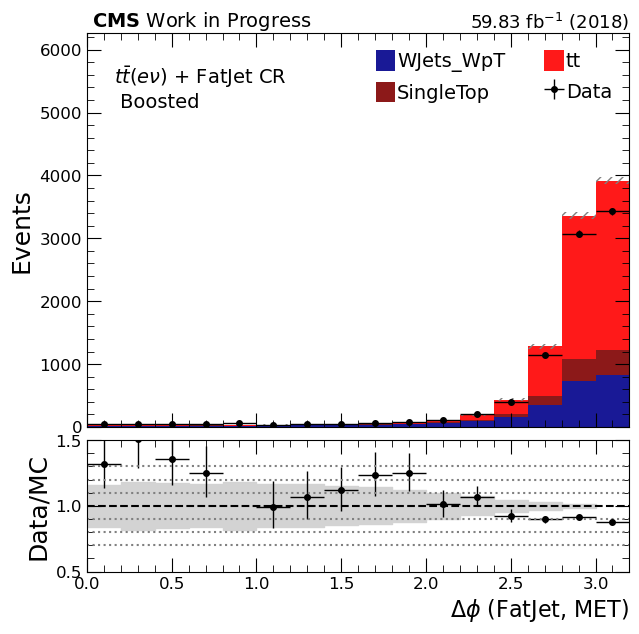

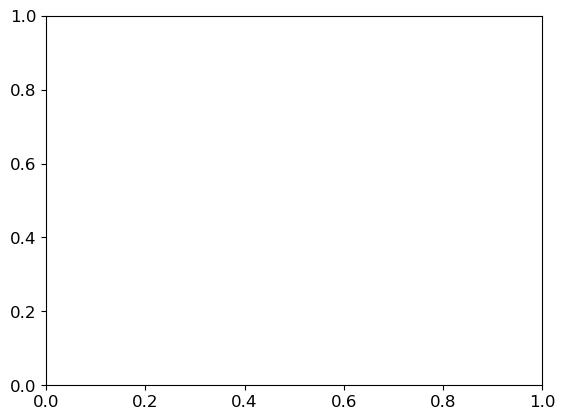

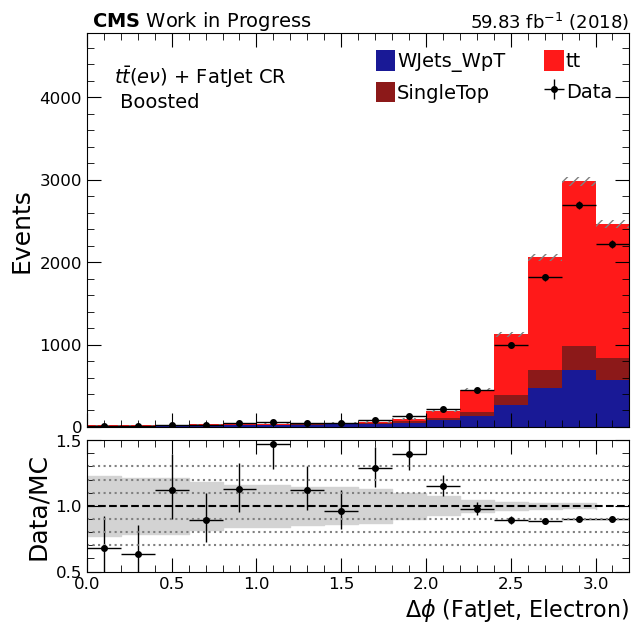

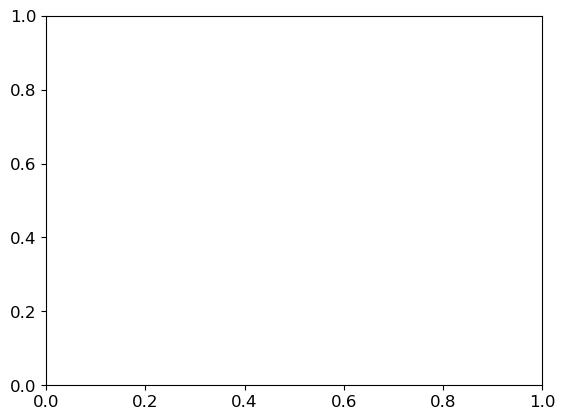

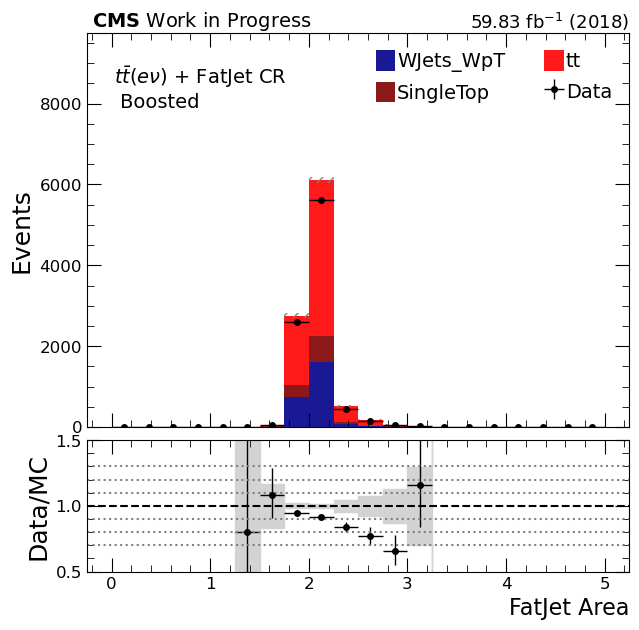

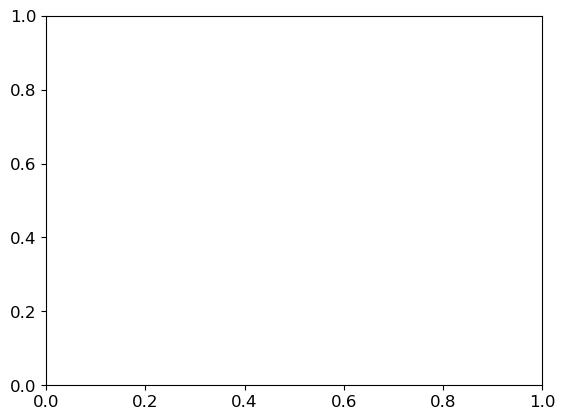

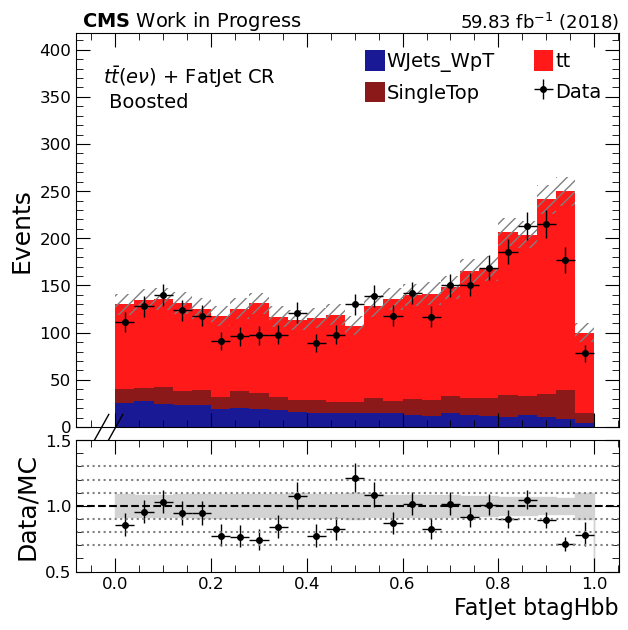

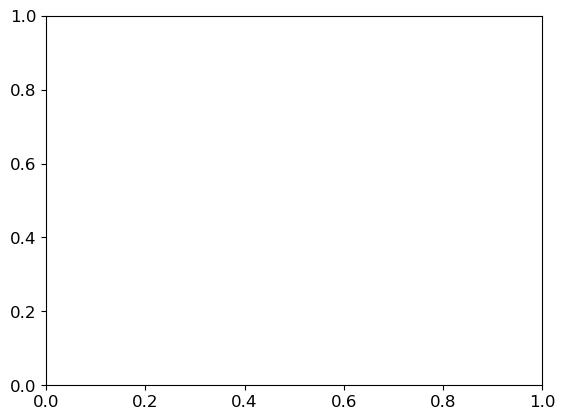

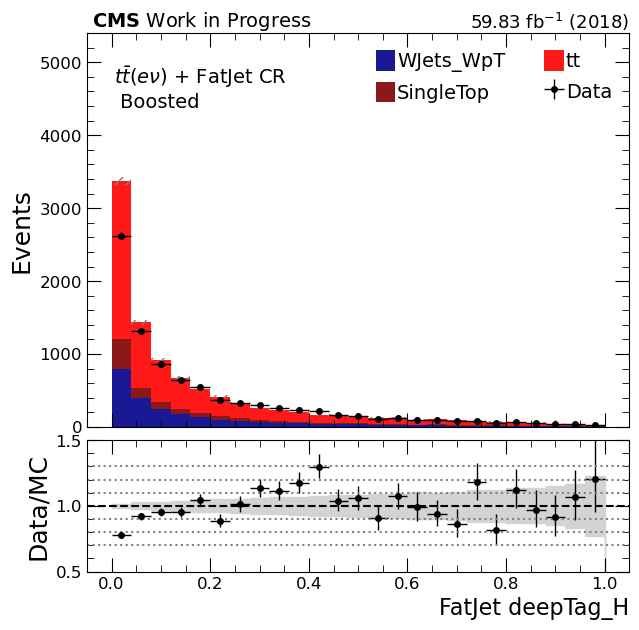

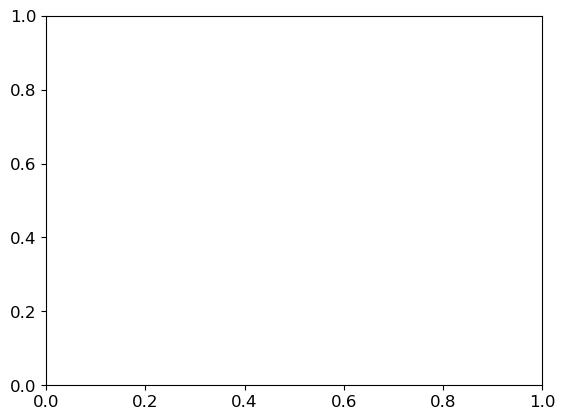

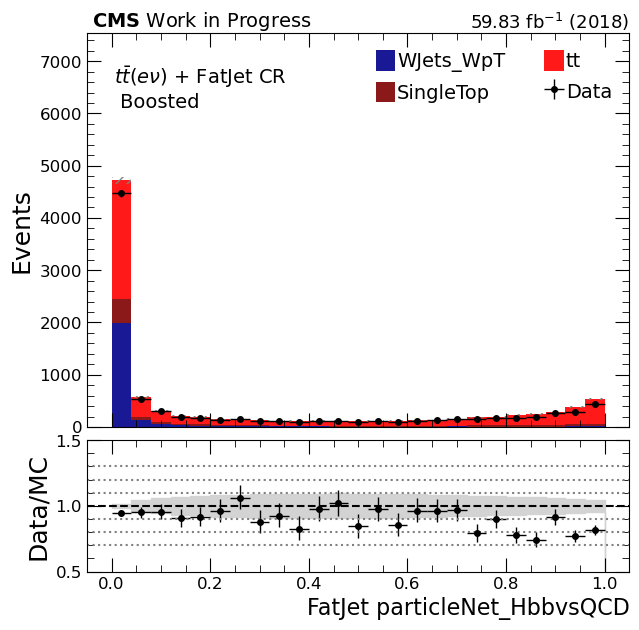

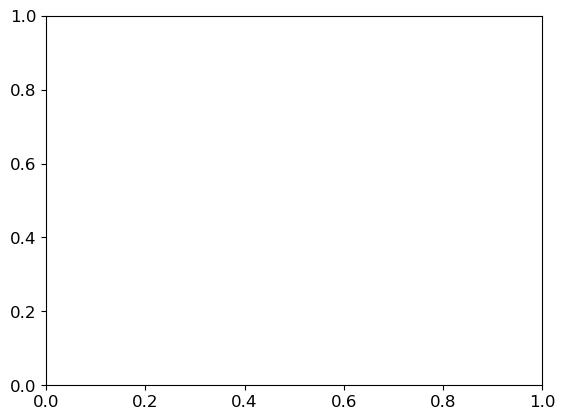

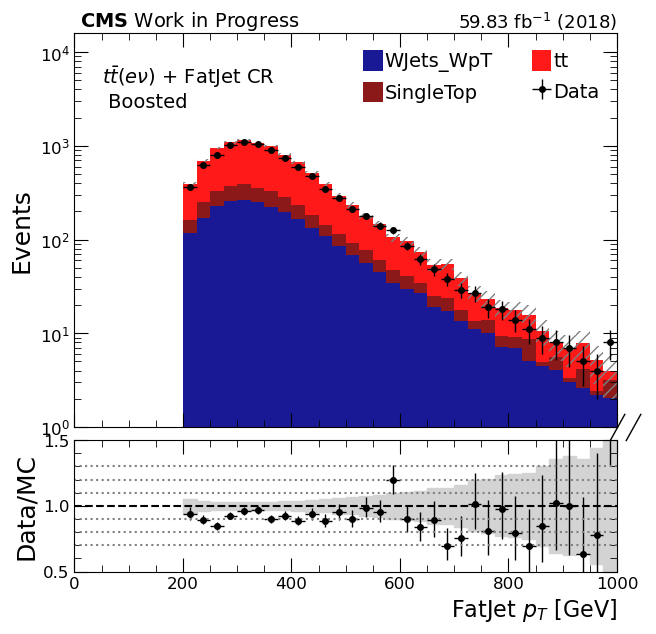

In [6]:
import hist
import numpy as np
import awkward as ak
from coffea import util
from coffea.processor import accumulate
from coffea.lookup_tools import extractor, dense_lookup
import mplhep as hep
import matplotlib.pyplot as plt
from plotting import GroupBy
from plottingTool import plotWithRatio

extraText = r"$t \bar{t}$($e \nu$) + FatJet CR"+" \n"+" Boosted"
#-rw-rw-r-- 1 bsahu bsahu  31K Mar 10 23:45 output_DataC_BCatTope2018_run20240310_160556.coffea
#-rw-rw-r-- 1 bsahu bsahu  30K Mar 10 23:45 output_DataB_BCatTope2018_run20240310_160035.coffea
#-rw-rw-r-- 1 bsahu bsahu  33K Mar 10 23:45 output_DataA_BCatTope2018_run20240310_161659.coffea
#-rw-rw-r-- 1 bsahu bsahu  34K Mar 10 23:45 output_DataD_BCatTope2018_run20240310_163738.coffea
#-rw-rw-r-- 1 bsahu bsahu 1.6M Mar 10 23:45 output_MCSingleTop2_BCatTope2018_run20240310_170949.coffea
#-rw-rw-r-- 1 bsahu bsahu 905K Mar 10 23:45 output_MCTTbar1l1v_BCatTope2018_run20240310_181748.coffea
#-rw-rw-r-- 1 bsahu bsahu 3.5M Mar 10 23:45 output_MCWlvJets_BCatTope2018_run20240310_205459.coffea
outputData = accumulate([
    util.load("coffea_files/ver3/output_DataA_BCatTope2018_run20240310_161659.coffea"),
    util.load("coffea_files/ver3/output_DataB_BCatTope2018_run20240310_160035.coffea"),
    util.load("coffea_files/ver3/output_DataC_BCatTope2018_run20240310_160556.coffea"),
    util.load("coffea_files/ver3/output_DataD_BCatTope2018_run20240310_163738.coffea"),
])
outputMC = accumulate([
    util.load("coffea_files/ver3/output_MCTTbar1l1v_BCatTope2018_run20240310_181748.coffea"),
    util.load("coffea_files/ver3/output_MCSingleTop1_BCatTope2018_run20240311_063301.coffea"),
    util.load("coffea_files/ver3/output_MCSingleTop2_BCatTope2018_run20240310_170949.coffea"),
    util.load("coffea_files/ver3/output_MCWlvJets_BCatTope2018_run20240310_205459.coffea"),
])


# specify the MC grouping
groupingMC = {
    "WJets_WpT": [
        "WJets_LNu_WPt_100To250_18",
        "WJets_LNu_WPt_250To400_18",
        "WJets_LNu_WPt_400To600_18",
        "WJets_LNu_WPt_600Toinf_18",
    ],
    "SingleTop": [
       "ST_tW_top_18",  
       "ST_tW_antitop_18",
       "ST_tchannel_top_18",  
       "ST_tchannel_antitop_18",  
    ],
    "tt": [
        "TTToSemiLeptonic_18",
        #"TTTo2L2Nu_18",
        #"TTToHadronic_18",
    ],
}

#Defined by Prayag ######################################
# Separate the debug histograms from the main histograms
temp = {}
debug_temp = {}
for key in outputData.keys():
    temp[key]={}
    debug_temp[key]={}
    for subkey in outputData[key].keys():
        if subkey.startswith("debug"):
            debug_temp[key][subkey] = outputData[key][subkey]
        else:
            temp[key][subkey] = outputData[key][subkey]
outputData=temp.copy()
debug_outputData=debug_temp.copy()

temp = {}
debug_temp = {}
for key in outputMC.keys():
    temp[key]={}
    debug_temp[key]={}
    for subkey in outputMC[key].keys():
        if subkey.startswith("debug"):
            debug_temp[key][subkey] = outputMC[key][subkey]
        else :
            temp[key][subkey] = outputMC[key][subkey]
outputMC=temp.copy()
debug_outputMC=debug_temp.copy()
##########################################################

#----------------------------------------
## Group MC samples and Data eras ## #Modified by Prayag#
#----------------------------------------
histList = []
for samp, sampList in groupingMC.items():
    histList += [outputMC[s] for s in sampList]
outputHistMC = accumulate(histList)

debug_histList = []
for samp, sampList in groupingMC.items():
    debug_histList += [debug_outputMC[s] for s in sampList]
debug_outputHistMC = accumulate(debug_histList)

for key, histo in outputHistMC.items():
    if isinstance(histo, hist.Hist):
        outputHistMC[key] = GroupBy(histo, 'dataset', 'dataset', groupingMC)
outputHistData = accumulate([histo for key, histo in outputData.items()])

for key, histo in debug_outputHistMC.items():
    if isinstance(histo, hist.Hist):
        debug_outputHistMC[key] = GroupBy(histo, 'dataset', 'dataset', groupingMC)
debug_outputHistData = accumulate([histo for key, histo in debug_outputData.items()])

# print("outputHistData\n", outputHistData.keys())
# print("outputHistMC\n", outputHistMC.keys())
# print("debug_outputHistData\n", debug_outputHistData.keys())
# print("debug_outputHistMC\n", debug_outputHistMC.keys())

#----------------------------------------
## Make Cutflow Table ##
#----------------------------------------
for key in outputHistMC.keys():
    if key.startswith('Cutflow_BCat_CRTope'): 
        
        #make cutflow table
        Nevents_MC = outputHistMC[key][{"dataset": sum}].values()
        Nevents_Data = outputHistData[key][{"dataset": sum}].values()
        Ratio_DataMC = Nevents_Data[:13]/Nevents_MC[:13]

        bins_B_1eCR = np.linspace(0,12,13)

        #BCat_Tope_CR = {
        #    "metTrigger",
        #    "electronTrigger",
        #    "NAK8Jet=1",
        #    "NisoaddAK4j<=2",
        #    "Nisoloosebjet=1",
        #    "NtightElectron=1",
        #    "NlooseMuons=0",
        #    "MET>50GeV",
        #    "Recoil_eTopCR>250GeV",
        #    "metFilters",
        #    "Ntaus=0",
        #    "Nphotons=0",
        #    "HEM_veto"
        #    }

        sels_B_1eCR = [
            "NoCut",
            "MET-Trigger",
            "Electron-Trigger",
            r"N(FatJet)=1",
            r"$N_{IsoAddjet}\leq2$",
            r"$N_{IsoLooseBtagjet}=1$",
            r"$N_{e}=1$",
            r"$p_{T}^{miss}>50$GeV",
            r"Recoil$>250$GeV",
            "MET-Filter",
            r"$N_{tau}=0$",
            r"$N_{\gamma}=0$",
            "HEM-veto"
        ]
        import pandas as pd 
        Dict = {'Bin': bins_B_1eCR, 'Selection': sels_B_1eCR, 'NEvts_data': Nevents_Data[:13], 'NEvts_bkg': Nevents_MC[:13], 'Ratio': Ratio_DataMC}
        #print(Dict)
        df = pd.DataFrame(Dict)
        np.savetxt('plots/ver3/boosted/e/'+str(key)+'_table_2018.txt', df.values, delimiter="\t", fmt='%d\t%s\t%.2e\t%.2e\t%.3f') 
        print("Cutflow saved")

        # make cutflow plot
        hMC = outputHistMC[key]
        #print(key)
        #print(outputHistMC[key])
        hData = outputHistData[key][{'dataset':sum}]
        #print(outputHistData[key][{'dataset':sum}])
        #print(hMC)
        #print(hData)
        plotWithRatio(h=hMC, hData=hData, overlay='dataset', logY=True, xLabel='Selection Bin', xRange=None, colors_cat='Topmu', extraText=None, lumi=59.83, year=2018)
        plt.savefig('plots/ver3/boosted/e/'+str(key)+'_plot_2018.png')
        print("Cutflow plot saved")
 

#----------------------------------------
## Kinematic Plots ##
#----------------------------------------
def make_kinematicplot(var, Xlabel, rebin_factor, logY, xRange=None):
    h1 = outputHistMC[var][{"systematic": 'nominal'}][...,::hist.rebin(rebin_factor)]
    hData = outputHistData[var][{'dataset':sum}][{"systematic": 'noweight'}][...,::hist.rebin(rebin_factor)]
    
    figr, (ax) = plt.subplots(1)
    plotWithRatio(h=h1, hData=hData, overlay='dataset', logY=logY, xLabel=Xlabel, xRange=xRange, colors_cat='Topmu', extraText=extraText, lumi=59.83, year=2018)
    plt.savefig('plots/ver3/boosted/e/'+var+'_BCatTope_2018.png')
    print(var, " plot saved")

def make_debug_kinematicplot(debugvar, var, Xlabel, rebin_factor, logY, xRange=None):
    var = 'debug_'+var
    h1 = debug_outputHistMC[var][{"debug":debugvar,"systematic": 'nominal'}][...,::hist.rebin(rebin_factor)]
    hData = debug_outputHistData[var][{'dataset':sum}][{"debug":debugvar,"systematic": 'noweight'}][...,::hist.rebin(rebin_factor)]
    
    figr, (ax) = plt.subplots(1)
    plotWithRatio(h=h1, hData=hData, overlay='dataset', logY=logY, xLabel=Xlabel, xRange=xRange, colors_cat='Topmu', extraText=extraText, lumi=59.83, year=2018)
    plt.savefig('plots/ver3/boosted/e/debug_'+var+debugvar+'_BCatTope_2018.png')
    print('debug_'+var+debugvar, " plot saved")


# MET and Recoil
make_kinematicplot(var="MET_pT", Xlabel="MET [GeV]", rebin_factor=4, logY=True, xRange=[0.,800.])
make_kinematicplot(var="MET_Phi", Xlabel=r"MET $\phi$ [GeV]", rebin_factor=6, logY=False)
make_kinematicplot(var="Recoil", Xlabel="Recoil [GeV]", rebin_factor=4, logY=True, xRange=[0.,1000.])
make_kinematicplot(var="Recoil_Phi", Xlabel=r"Recoil $\phi$ [GeV]", rebin_factor=5, logY=False)
make_kinematicplot(var="HT", Xlabel="HT [GeV]", rebin_factor=4, logY=True,) #xRange=[0.,1000.])

make_debug_kinematicplot(debugvar='withoutvetos', var="MET_pT", Xlabel="MET [GeV]", rebin_factor=4, logY=True, xRange=[0.,800.])
make_debug_kinematicplot(debugvar='minusHEM', var="MET_pT", Xlabel="MET [GeV]", rebin_factor=4, logY=True, xRange=[0.,800.])
make_debug_kinematicplot(debugvar='withoutvetos', var="MET_Phi", Xlabel=r"MET $\phi$ [GeV]", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='minusHEM', var="MET_Phi", Xlabel=r"MET $\phi$ [GeV]", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='withoutvetos', var="Recoil", Xlabel="Recoil [GeV]", rebin_factor=4, logY=True, xRange=[0.,1000.])
make_debug_kinematicplot(debugvar='minusHEM', var="Recoil", Xlabel="Recoil [GeV]", rebin_factor=4, logY=True, xRange=[0.,1000.])
make_debug_kinematicplot(debugvar='withoutvetos', var="Recoil_Phi", Xlabel=r"Recoil $\phi$ [GeV]", rebin_factor=5, logY=False)
make_debug_kinematicplot(debugvar='minusHEM', var="Recoil_Phi", Xlabel=r"Recoil $\phi$ [GeV]", rebin_factor=5, logY=False)

# Electron
make_kinematicplot(var="Electron_pT", Xlabel=r"Electron $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,800.])
make_kinematicplot(var="Electron_Eta", Xlabel=r"Electron $\eta$", rebin_factor=6, logY=False)
make_kinematicplot(var="Electron_Phi", Xlabel=r"Electron $\phi$", rebin_factor=6, logY=False)
make_kinematicplot(var="dPhi_met_Electron", Xlabel=r"$\Delta \phi$ (Electron, MET)", rebin_factor=2, logY=False, xRange=[0., 3.2])
make_kinematicplot(var="dPhi_recoil_Electron", Xlabel=r"$\Delta \phi$ (Electron, Recoil)", rebin_factor=2, logY=False, xRange=[0., 3.2])

make_debug_kinematicplot(debugvar='withoutvetos', var="Electron_pT", Xlabel=r"Electron $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,800.])
make_debug_kinematicplot(debugvar='minusHEM', var="Electron_pT", Xlabel=r"Electron $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,800.])
make_debug_kinematicplot(debugvar='withoutvetos',var="Electron_Eta", Xlabel=r"Electron $\eta$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='minusHEM',var="Electron_Eta", Xlabel=r"Electron $\eta$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='withoutvetos',var="Electron_Phi", Xlabel=r"Electron $\phi$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='minusHEM',var="Electron_Phi", Xlabel=r"Electron $\phi$", rebin_factor=6, logY=False)

# Fatjet
make_kinematicplot(var="FJet_pT", Xlabel=r"FatJet $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,1000.])
make_kinematicplot(var="FJet_Eta", Xlabel=r"FatJet $\eta$", rebin_factor=6, logY=False)
make_kinematicplot(var="FJet_Phi", Xlabel=r"FatJet $\phi$", rebin_factor=6, logY=False)
make_kinematicplot(var="FJet_M", Xlabel=r"FatJet $Mass$ [GeV]", rebin_factor=4, logY=False, xRange=[0.,200.])
make_kinematicplot(var="FJet_Msd", Xlabel=r"FatJet $Mass_{softdrop}$ [GeV]", rebin_factor=4, logY=False, xRange=[0.,200.])
make_kinematicplot(var="dPhi_met_FJet", Xlabel=r"$\Delta \phi$ (FatJet, MET)", rebin_factor=2, logY=False, xRange=[0., 3.2])
make_kinematicplot(var="dPhi_Electron_FJet", Xlabel=r"$\Delta \phi$ (FatJet, Electron)", rebin_factor=2, logY=False, xRange=[0., 3.2])
make_kinematicplot(var="FJet_Area", Xlabel=r"FatJet Area", rebin_factor=5, logY=False)
make_kinematicplot(var="FJet_btagHbb", Xlabel=r"FatJet btagHbb", rebin_factor=2, logY=False)
make_kinematicplot(var="FJet_deepTag_H", Xlabel=r"FatJet deepTag_H", rebin_factor=2, logY=False)
make_kinematicplot(var="FJet_particleNet_HbbvsQCD", Xlabel=r"FatJet particleNet_HbbvsQCD", rebin_factor=2, logY=False)

make_debug_kinematicplot(debugvar='withoutvetos', var="FJet_pT", Xlabel=r"FatJet $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,1000.])
make_debug_kinematicplot(debugvar='minusHEM', var="FJet_pT", Xlabel=r"FatJet $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,1000.])
make_debug_kinematicplot(debugvar='withoutvetos', var="FJet_Eta", Xlabel=r"FatJet $\eta$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='minusHEM', var="FJet_Eta", Xlabel=r"FatJet $\eta$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='withoutvetos', var="FJet_Phi", Xlabel=r"FatJet $\phi$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='minusHEM', var="FJet_Phi", Xlabel=r"FatJet $\phi$", rebin_factor=6, logY=False)
make_debug_kinematicplot(debugvar='withoutvetos', var="FJet_Msd", Xlabel=r"FatJet $Mass_{softdrop}$ [GeV]", rebin_factor=4, logY=False, xRange=[0.,200.])
make_debug_kinematicplot(debugvar='minusHEM', var="FJet_Msd", Xlabel=r"FatJet $Mass_{softdrop}$ [GeV]", rebin_factor=4, logY=False, xRange=[0.,200.])

#N-1
make_kinematicplot(var="FJet_pT_BCatMinus2", Xlabel=r"FatJet $p_{T}$ [GeV]", rebin_factor=5, logY=True, xRange=[0.,1000.])
make_kinematicplot(var="FJet_Eta_BCatMinus2", Xlabel=r"FatJet $\eta$", rebin_factor=6, logY=False)
make_kinematicplot(var="FJet_Phi_BCatMinus2", Xlabel=r"FatJet $\phi$", rebin_factor=6, logY=False)
make_kinematicplot(var="FJet_M_BCatMinus2", Xlabel=r"FatJet $Mass$ [GeV]", rebin_factor=4, logY=False, xRange=[0.,200.])
make_kinematicplot(var="FJet_Msd_BCatMinus2", Xlabel=r"FatJet $Mass_{softdrop}$ [GeV]", rebin_factor=4, logY=False, xRange=[0.,200.])
make_kinematicplot(var="dPhi_met_FJet_BCatMinus2", Xlabel=r"$\Delta \phi$ (FatJet, MET)", rebin_factor=2, logY=False, xRange=[0., 3.2])
make_kinematicplot(var="dPhi_Electron_FJet_BCatMinus2", Xlabel=r"$\Delta \phi$ (FatJet, Electron)", rebin_factor=2, logY=False, xRange=[0., 3.2])
make_kinematicplot(var="FJet_Area_BCatMinus2", Xlabel=r"FatJet Area", rebin_factor=5, logY=False)
make_kinematicplot(var="FJet_btagHbb_BCatMinus2", Xlabel=r"FatJet btagHbb", rebin_factor=2, logY=False)
make_kinematicplot(var="FJet_deepTag_H_BCatMinus2", Xlabel=r"FatJet deepTag_H", rebin_factor=2, logY=False)
make_kinematicplot(var="FJet_particleNet_HbbvsQCD_BCatMinus2", Xlabel=r"FatJet particleNet_HbbvsQCD", rebin_factor=2, logY=False)

#ak4 jet
make_kinematicplot(var="bJet_N", Xlabel=r"N iso Loose b-tag jets", rebin_factor=1, logY=False)
make_kinematicplot(var="Jet_N", Xlabel=r"N iso additional jets", rebin_factor=1, logY=False)
make_kinematicplot(var="bJet_N_BCatMinus2", Xlabel=r"N iso Loose b-tag jets [AK8-Selection]", rebin_factor=1, logY=False)
make_kinematicplot(var="Jet_N_BCatMinus2", Xlabel=r"N iso additional jets [AK8-Selection]", rebin_factor=1, logY=False)
make_kinematicplot(var="bJet_N_BCatMinus1", Xlabel=r"N iso Loose b-tag jets [AK8-Selection + Nj$\leq$2]", rebin_factor=1, logY=False)

make_kinematicplot(var="Jet_pT", Xlabel=r"Jets $p_{T}$ [GeV]", rebin_factor=5, logY=False)
make_kinematicplot(var="Jet_Eta", Xlabel=r"Jets $\eta$", rebin_factor=6, logY=False)
make_kinematicplot(var="Jet_Phi", Xlabel=r"Jets $\phi$", rebin_factor=6, logY=False)
make_kinematicplot(var="Jet_M", Xlabel=r"Jets Mass [GeV]", rebin_factor=4, logY=False)
make_kinematicplot(var="Jet_btagDeepB", Xlabel=r"Jets btagDeepB", rebin_factor=2, logY=False)
make_kinematicplot(var="dPhi_met_Jet", Xlabel=r"$\Delta \phi$ (Jet, MET)", rebin_factor=2, logY=False)

make_kinematicplot(var="bJet_pT", Xlabel=r"bJets $p_{T}$ [GeV]", rebin_factor=5, logY=False)
make_kinematicplot(var="bJet_Eta", Xlabel=r"bJets $\eta$", rebin_factor=6, logY=False)
make_kinematicplot(var="bJet_Phi", Xlabel=r"bJets $\phi$", rebin_factor=6, logY=False)
make_kinematicplot(var="bJet_M", Xlabel=r"bJets Mass [GeV]", rebin_factor=4, logY=False)
make_kinematicplot(var="bJet_btagDeepB", Xlabel=r"bJets btagDeepB", rebin_factor=2, logY=False)
make_kinematicplot(var="dPhi_met_bJet", Xlabel=r"$\Delta \phi$ (bJet, MET)", rebin_factor=2, logY=False)

make_kinematicplot(var="Jet_pT_BCatMinus2", Xlabel=r"Jets $p_{T}$ [GeV] [AK8-Selection-only]", rebin_factor=5, logY=False)
make_kinematicplot(var="Jet_Eta_BCatMinus2", Xlabel=r"Jets $\eta$ [AK8-Selection-only]", rebin_factor=6, logY=False)
make_kinematicplot(var="Jet_Phi_BCatMinus2", Xlabel=r"Jets $\phi$ [AK8-Selection-only]", rebin_factor=6, logY=False)
make_kinematicplot(var="Jet_M_BCatMinus2", Xlabel=r"Jets Mass [GeV] [AK8-Selection-only]", rebin_factor=4, logY=False)
make_kinematicplot(var="Jet_btagDeepB_BCatMinus2", Xlabel=r"Jets btagDeepB [AK8-Selection-only]", rebin_factor=2, logY=False)
make_kinematicplot(var="dPhi_met_Jet_BCatMinus2", Xlabel=r"$\Delta \phi$ (Jet, MET) [AK8-Selection-only]", rebin_factor=2, logY=False)

make_kinematicplot(var="bJet_pT_BCatMinus2", Xlabel=r"bJets $p_{T}$ [GeV] [AK8-Selection-only]", rebin_factor=5, logY=False)
make_kinematicplot(var="bJet_Eta_BCatMinus2", Xlabel=r"bJets $\eta$ [AK8-Selection-only]", rebin_factor=6, logY=False)
make_kinematicplot(var="bJet_Phi_BCatMinus2", Xlabel=r"bJets $\phi$ [AK8-Selection-only]", rebin_factor=6, logY=False)
make_kinematicplot(var="bJet_M_BCatMinus2", Xlabel=r"bJets Mass [GeV] [AK8-Selection-only]", rebin_factor=4, logY=False)
make_kinematicplot(var="bJet_btagDeepB_BCatMinus2", Xlabel=r"bJets btagDeepB [AK8-Selection-only]", rebin_factor=2, logY=False)
make_kinematicplot(var="dPhi_met_bJet_BCatMinus2", Xlabel=r"$\Delta \phi$ (bJet, MET) [AK8-Selection-only]", rebin_factor=2, logY=False)

make_kinematicplot(var="bJet_pT_BCatMinus1", Xlabel=r"bJets $p_{T}$ [GeV] [AK8-Selection-only]", rebin_factor=5, logY=False)
make_kinematicplot(var="bJet_Eta_BCatMinus1", Xlabel=r"bJets $\eta$ [AK8-Selection-only]", rebin_factor=6, logY=False)
make_kinematicplot(var="bJet_Phi_BCatMinus1", Xlabel=r"bJets $\phi$ [AK8-Selection-only]", rebin_factor=6, logY=False)
make_kinematicplot(var="bJet_M_BCatMinus1", Xlabel=r"bJets Mass [GeV] [AK8-Selection-only]", rebin_factor=4, logY=False)
make_kinematicplot(var="bJet_btagDeepB_BCatMinus1", Xlabel=r"bJets btagDeepB [AK8-Selection-only]", rebin_factor=2, logY=False)

#----------------------------------------
def make_kinematicplot_2d(var, whichtau, Xlabel, rebin_factor, logY, xRange=None):

    hMC_ = outputHistMC[var][{"labelname": whichtau, "systematic": 'nominal'}][...,::hist.rebin(rebin_factor)]
    hData_ = outputHistData[var][{'dataset':sum}][{"labelname": whichtau, "systematic": 'noweight'}][...,::hist.rebin(rebin_factor)]
    figr, (ax) = plt.subplots(1)
    plotWithRatio(h=hMC_, hData=hData_, overlay='dataset', logY=logY, xLabel=Xlabel, xRange=xRange, colors_cat='Topmu', extraText=extraText, lumi=59.83, year=2018)
    plt.savefig('plots/ver3/boosted/e/FJet_'+whichtau+'_2018.png')
    print(whichtau, " plot saved")

make_kinematicplot_2d(var="FJet_TauN", whichtau='tau1', Xlabel=r"FatJet $\tau_{1}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauN", whichtau='tau2', Xlabel=r"FatJet $\tau_{2}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauN", whichtau='tau3', Xlabel=r"FatJet $\tau_{3}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauN", whichtau='tau4', Xlabel=r"FatJet $\tau_{4}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauNM", whichtau='tau21', Xlabel=r"FatJet $\tau_{21}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauNM", whichtau='tau31', Xlabel=r"FatJet $\tau_{31}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauNM", whichtau='tau32', Xlabel=r"FatJet $\tau_{32}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_n2b1_n3b1", whichtau='n2b1', Xlabel=r"FatJet $N_{2} \beta_{1}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_n2b1_n3b1", whichtau='n3b1', Xlabel=r"FatJet $N_{3} \beta_{1}$", rebin_factor=1, logY=False)

make_kinematicplot_2d(var="FJet_TauN_BCatMinus2", whichtau='tau1', Xlabel=r"FatJet $\tau_{1}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauN_BCatMinus2", whichtau='tau2', Xlabel=r"FatJet $\tau_{2}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauN_BCatMinus2", whichtau='tau3', Xlabel=r"FatJet $\tau_{3}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauN_BCatMinus2", whichtau='tau4', Xlabel=r"FatJet $\tau_{4}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauNM_BCatMinus2", whichtau='tau21', Xlabel=r"FatJet $\tau_{21}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauNM_BCatMinus2", whichtau='tau31', Xlabel=r"FatJet $\tau_{31}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_TauNM_BCatMinus2", whichtau='tau32', Xlabel=r"FatJet $\tau_{32}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_n2b1_n3b1_BCatMinus2", whichtau='n2b1', Xlabel=r"FatJet $N_{2} \beta_{1}$", rebin_factor=1, logY=False)
make_kinematicplot_2d(var="FJet_n2b1_n3b1_BCatMinus2", whichtau='n3b1', Xlabel=r"FatJet $N_{3} \beta_{1}$", rebin_factor=1, logY=False)


#----------------------------------------
## Systematics variation ##
#----------------------------------------
def checkSyst_nomUpDown(var, var_axis, syste, Title):

    histo = outputHistMC[var]

    h0 = histo[{"systematic": 'nominal'}].project(var_axis)[...,::hist.rebin(4)]
    h1 = histo[{"systematic": str(syste)+'Up'}].project(var_axis)[...,::hist.rebin(4)]
    h2 = histo[{"systematic": str(syste)+'Down'}].project(var_axis)[...,::hist.rebin(4)]

    figr, (ax) = plt.subplots(1)
    hep.histplot([h0,h1,h2], ax=ax, stack=False, label=['nominal', 'Up', 'Down'], histtype='step', yerr=False)
    ax.set_xlim(0,500)
    ax.set_ylabel("Events")
    ax.set_title(Title, fontsize=16)
    ax.legend(fontsize=15)
    plt.savefig('plots/ver3/boosted/e/'+str(var)+'_'+str(syste)+'_updown_2018.png') 
    print(str(var)+'_'+str(syste)+'_updown', "plot saved")

checkSyst_nomUpDown(var="MET_pT", var_axis="met", syste='JES', Title='JES')
checkSyst_nomUpDown(var="MET_pT", var_axis="met", syste='JER', Title='JER')
#checkSyst_nomUpDown(var="MET_pT", var_axis="met", syste='electronEffWeight', Title='Electron (Iso+ID) SF')
checkSyst_nomUpDown(var="MET_pT", var_axis="met", syste='btagWeight', Title='btag SF')
checkSyst_nomUpDown(var="MET_pT", var_axis="met", syste='puWeight', Title='Pileup weight')
checkSyst_nomUpDown(var="MET_pT", var_axis="met", syste='TriggerSFWeight', Title='Trigger SF')

checkSyst_nomUpDown(var="Recoil", var_axis="recoil", syste='JES', Title='JES')
checkSyst_nomUpDown(var="Recoil", var_axis="recoil", syste='JER', Title='JER')
#checkSyst_nomUpDown(var="Recoil", var_axis="recoil", syste='electronEffWeight', Title='Electron (Iso+ID) SF')
checkSyst_nomUpDown(var="Recoil", var_axis="recoil", syste='btagWeight', Title='btag SF')
checkSyst_nomUpDown(var="Recoil", var_axis="recoil", syste='puWeight', Title='Pileup weight')
checkSyst_nomUpDown(var="Recoil", var_axis="recoil", syste='TriggerSFWeight', Title='Trigger SF')
